In [46]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
churn = pd.read_csv('Churn_Modelling (1).csv')

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.tail

<bound method NDFrame.tail of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [6]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
churn.shape

(10000, 14)

In [14]:
churn.describe(exclude= ['O'])
churn.describe(include = ['O'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [15]:
churn.shape[0], churn.CustomerId.nunique()

(10000, 10000)

In [16]:
churn["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
churn.groupby(['Surname']).agg({'RowNumber':'count', 'Exited':'mean'}).reset_index().sort_values(by='RowNumber', ascending=False).head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


In [18]:
churn.groupby(['Geography']).agg({'RowNumber':'count', 'Exited':'mean'}
).reset_index().sort_values(by='RowNumber', ascending=False)

,Geography,RowNumber,Exited
0,France,5014,0.161548
1,Germany,2509,0.324432
2,Spain,2477,0.166734


<AxesSubplot:ylabel='CreditScore'>

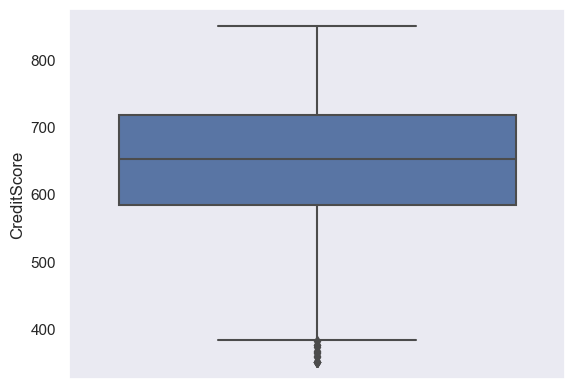

In [20]:
sns.set(style="dark")
sns.boxplot(y=churn['CreditScore'])

<AxesSubplot:ylabel='Age'>

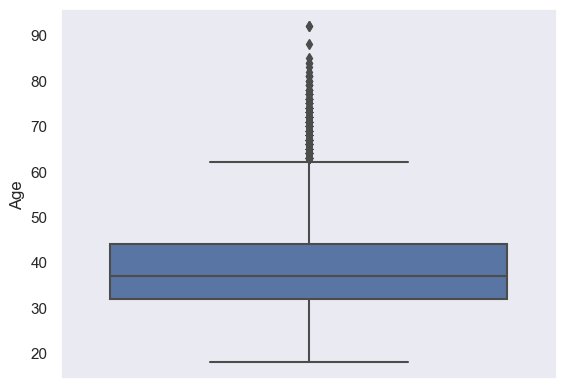

In [21]:
sns.boxplot(y=churn['Age'])

<AxesSubplot:ylabel='Tenure'>

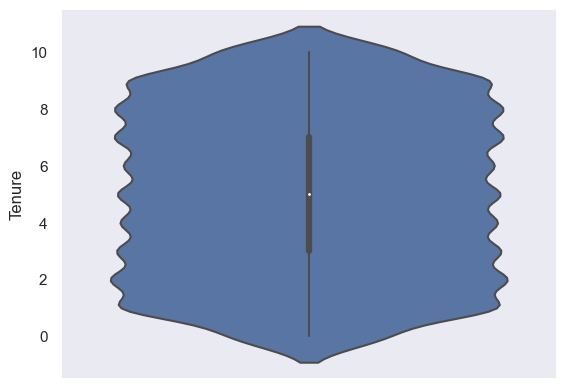

In [22]:
sns.violinplot(y = churn.Tenure)

In [23]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [25]:
churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<AxesSubplot:ylabel='Balance'>

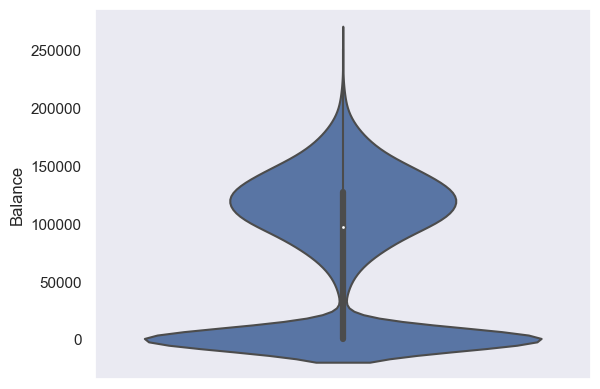

In [29]:
sns.violinplot(y = churn['Balance'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

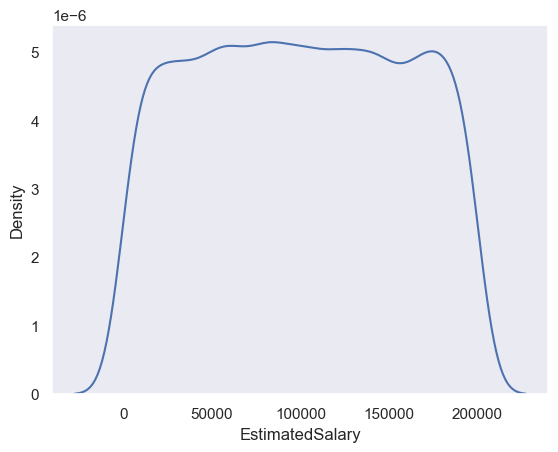

In [31]:
sns.kdeplot(churn.EstimatedSalary)

In [32]:
corelation = churn.corr()

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

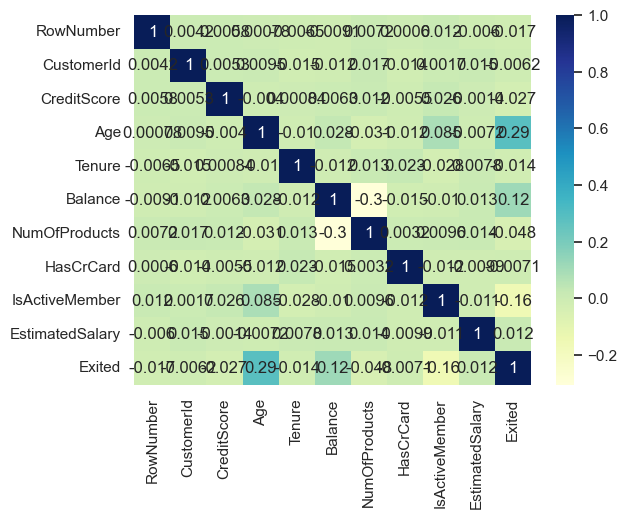

In [35]:
print(churn.corr())

dataplot = sns.heatmap(churn.corr(), cmap="YlGnBu", annot=True)

plt.show()

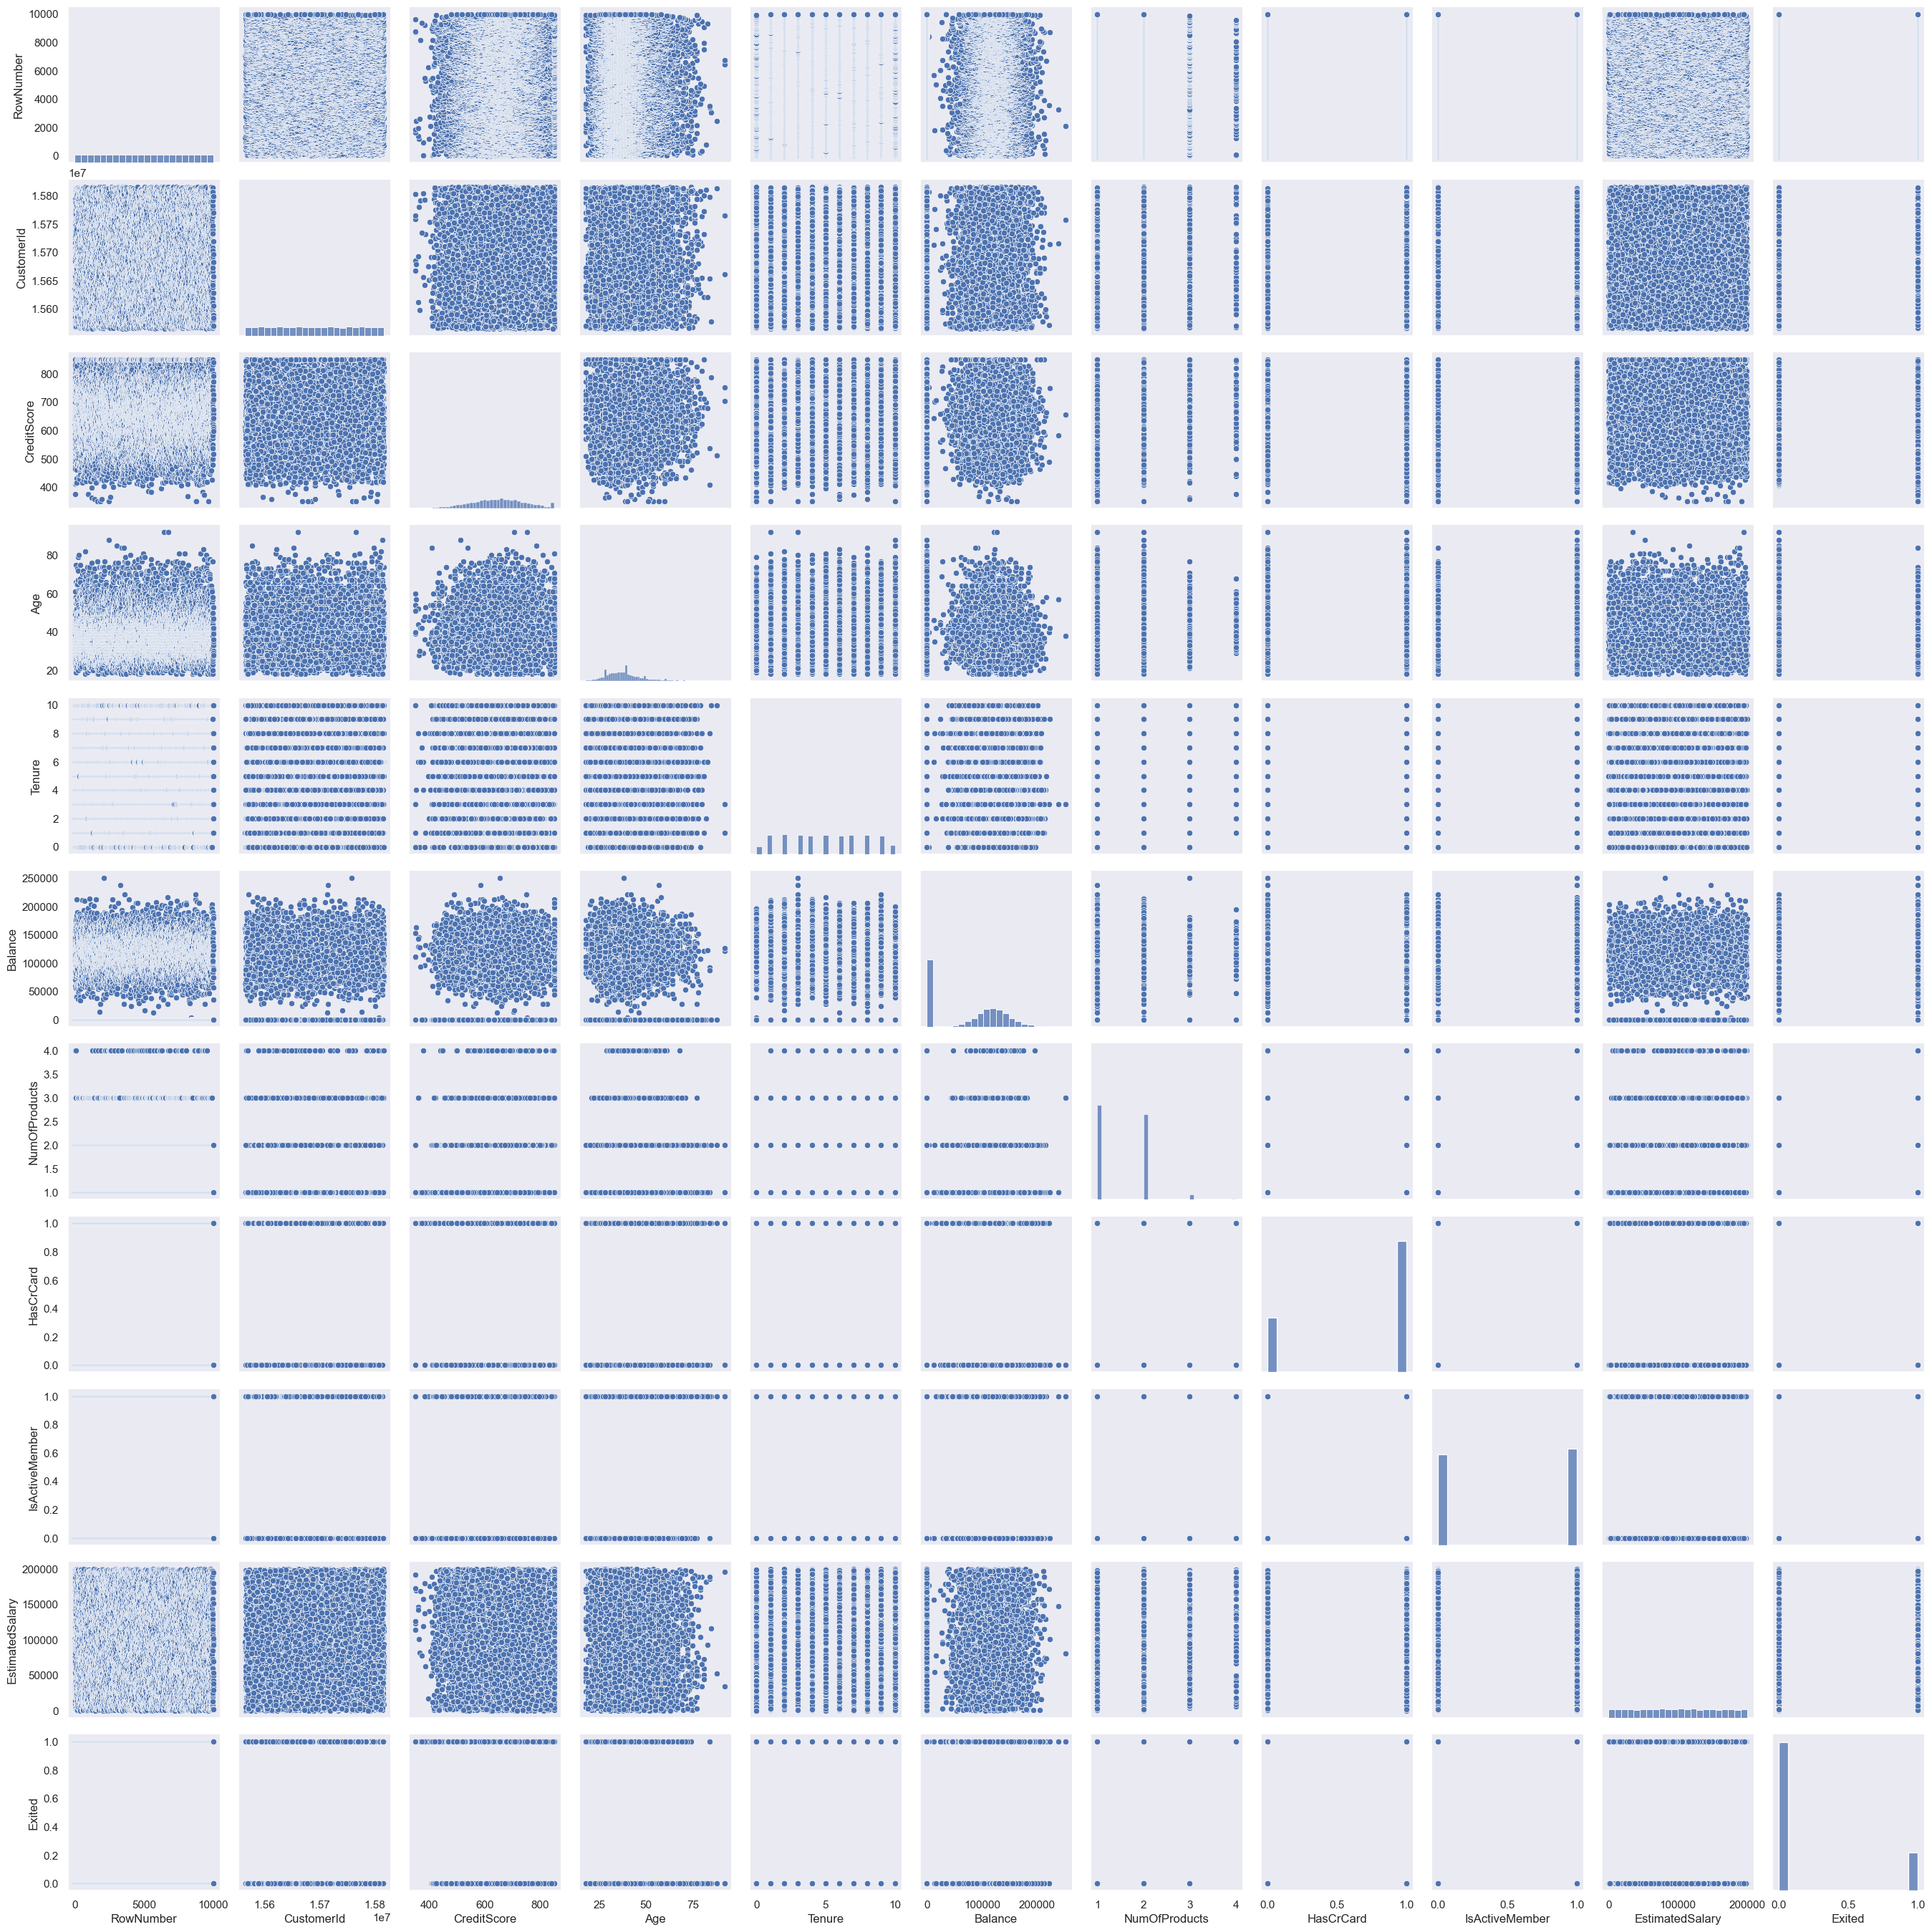

In [37]:
sns.pairplot(churn)
plt.show()

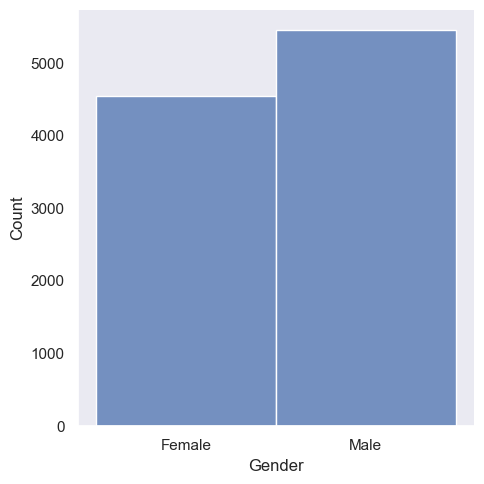

In [51]:
sns.displot(churn['Gender'])
plt.show()


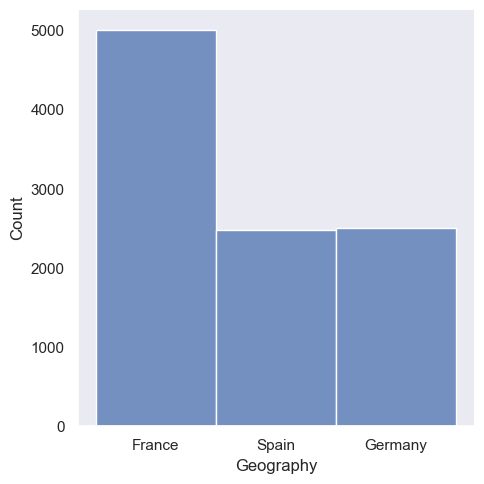

In [53]:
sns.displot(churn['Geography'])
plt.show()

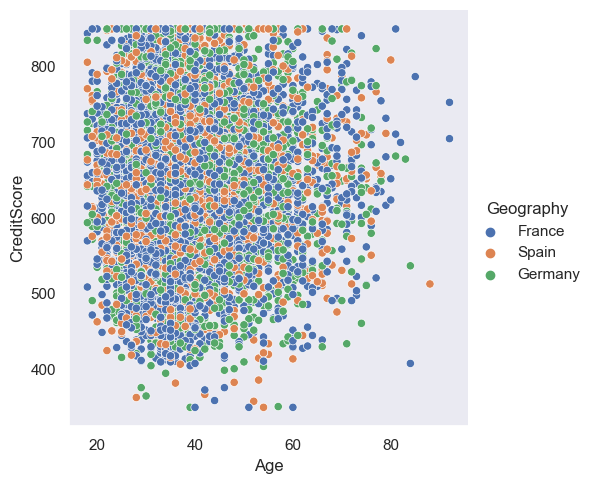

In [54]:
sns.relplot(x='Age', y='CreditScore', hue='Geography',data=churn)
plt.show()

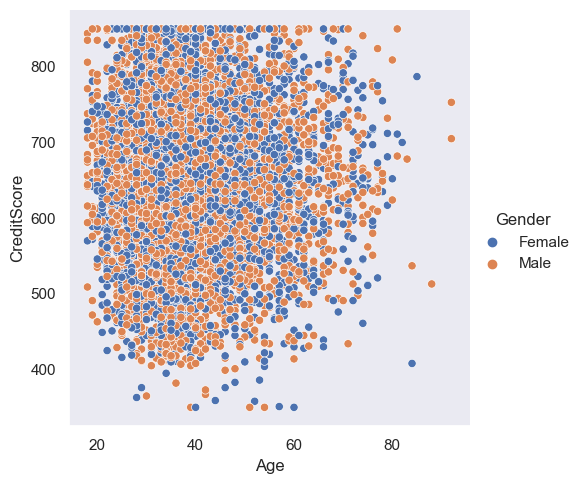

In [57]:
sns.relplot(x='Age', y='CreditScore', hue='Gender',data=churn)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

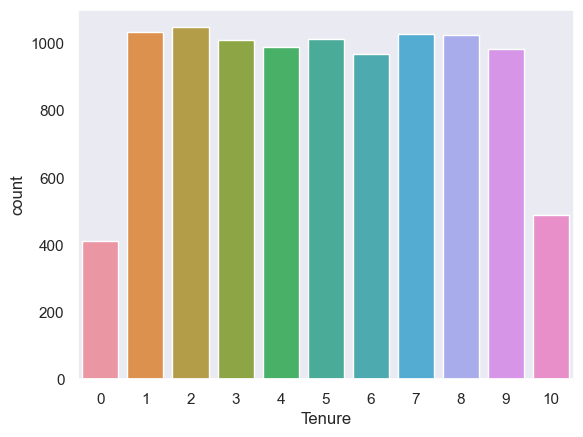

In [58]:
sns.countplot(churn['Tenure'])

In [59]:
churn.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [61]:
x =  churn[['Age', 'Tenure']]

In [63]:
y = churn['NumOfProducts']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [65]:
model = LinearRegression()

In [66]:

model.fit(x_train, y_train)

LinearRegression()

In [67]:
print(model.coef_)

[-0.00159513  0.00225466]


In [68]:
print(model.intercept_)

1.5858459808962395


In [69]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Age,-0.001595
Tenure,0.002255


In [70]:
predictions = model.predict(x_test)

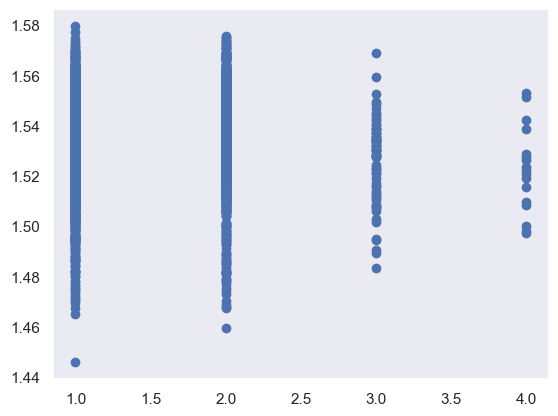

In [72]:
plt.scatter(y_test, predictions)
plt.show()

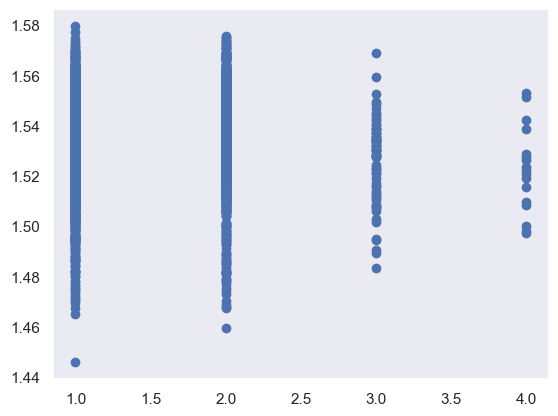

In [73]:
plt.scatter(y_test, predictions)
plt.show()

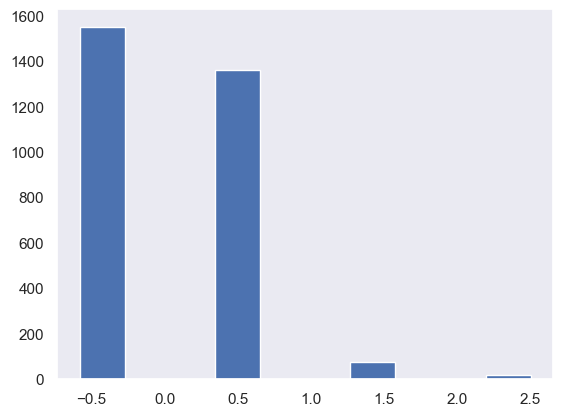

In [74]:
plt.hist(y_test - predictions)
plt.show()

In [75]:

metrics.mean_absolute_error(y_test, predictions)

0.535307208669925

In [76]:
metrics.mean_squared_error(y_test, predictions)

0.332068219194173